# International College of Economics and Finance

# Financial Econometrics. Class 01

## Lectures
- Sofya Budanova
- PhD, Economics, Northwestern University
- E-mail: sbudanova@hse.ru

## Classes
- Timur Zekokh
- E-mail: timurzekokh@gmail.com

## Teaching Objectives
- Event-study methodology in applied research
- Forecasting  financial  data  using  high-level  econometric  techniques  and  measuring  their effectiveness
- Testing the standard asset pricing models

## Grading
The  course  grade  consists  of  the  grades  for  the  home  assignments,  class  participation,  group 
presentation and report, and the final exam.
The formula of the final grade of the course:
$$G = 0.15 \cdot G_{HA} + 0.05 \cdot G_{part} + 0.2 \cdot G_{present} + 0.6 \cdot G_{final}$$,
where $G_{HA}$ is the  average  grade  for  the  home  assignments, $G_{part}$ is the  grade  for  the  class 
participation, $G_{present}$ is the grade for the  group presentation and report and $G_{final}$ is the grade 
for the final exam.

## Literature
1. John Campbell, Andrew Lo, Archie MacKinlay (1997). The Econometrics of Financial  Markets, Princeton University Press. (**CLM**)
2. Ruey S. Tsay (2010). Analysis of Financial Time Series. (**RT**)
3. John H. Cochrane (2009). Asset Pricing, Revised Edition, Princeton University Press. (**JC**)

## Course outline
1. Stylized facts of financial returns and sources of financial data
2. Event studies
3. Tests of return predictability
4. Markov switching model
5. Kalman filter
6. Volatility modeling
7. Cross-sectional asset pricing
8. Forecasting in big data environment

## Class 1. Stylized facts of financial returns and sources of financial data 

In [1]:
# Examples of installing packages
# install.packages("rusquant", repos="http://R-Forge.R-project.org")
# install.packages('tseries')
# install.packages('moments')

In [2]:
# For those who has non english OS
# Read ?Locales for more.
# Sys.setlocale("LC_TIME", "C")

In [1]:
# Let's use some libraries
library(quantmod)
library(rusquant) 
library(tseries) 
library(moments)
library(ggplot2)
library(repr)

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.2"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.2"
Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarte

### Everything starts with a price
Let's download prices of some companies

In [2]:
Apple <- quantmod::getSymbols("AAPL", scr = "yahoo", auto.assign = FALSE)
Aeroflot <- getSymbols("AFLT", src = "Finam", auto.assign = FALSE)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
"'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated")."

In [3]:
# Let's look into what we downloaded
head(Apple)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.586245
2007-01-04  3.001786  3.069643 2.993572   3.059286   847260400      2.643649
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.624823
2007-01-08  3.070000  3.090357 3.045714   3.052500   797106800      2.637785
2007-01-09  3.087500  3.320714 3.041071   3.306072  3349298400      2.856907
2007-01-10  3.383929  3.492857 3.337500   3.464286  2952880000      2.993625

In [4]:
head(Aeroflot)

           AFLT.Open AFLT.High AFLT.Low AFLT.Close AFLT.Volume
2007-01-09     57.50     59.90    56.52      59.75      764162
2007-01-10     59.95     59.98    58.71      59.85      632956
2007-01-11     59.51     60.50    58.40      59.07      243254
2007-01-12     58.80     60.40    58.00      60.39      216114
2007-01-15     60.42     62.00    60.00      61.80      428062
2007-01-16     61.75     69.00    60.33      66.50     2948453

In [8]:
# In most cases we are interested in the last price of the trading day (or close price)
Apple_price <- Apple$AAPL.Adjusted # Yahoo adjusts price of the companies to the dividends
Aeroflot_price <- Aeroflot$AFLT.Close # Unfortunately Finam does not

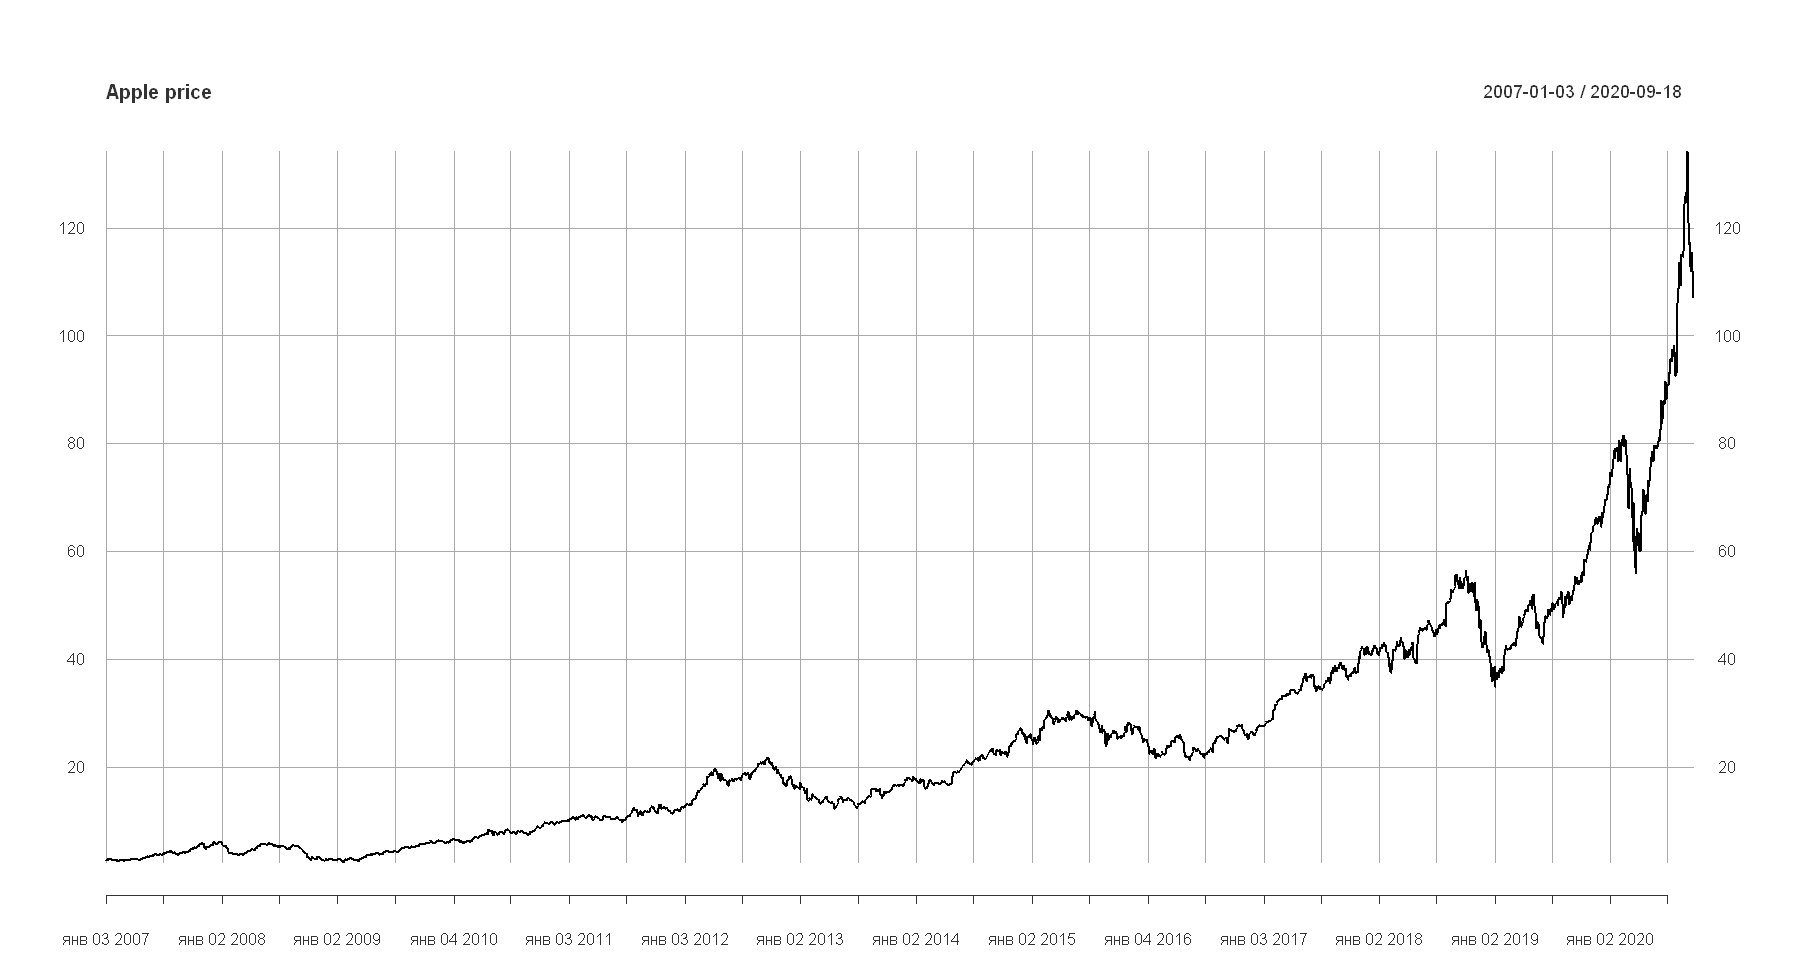

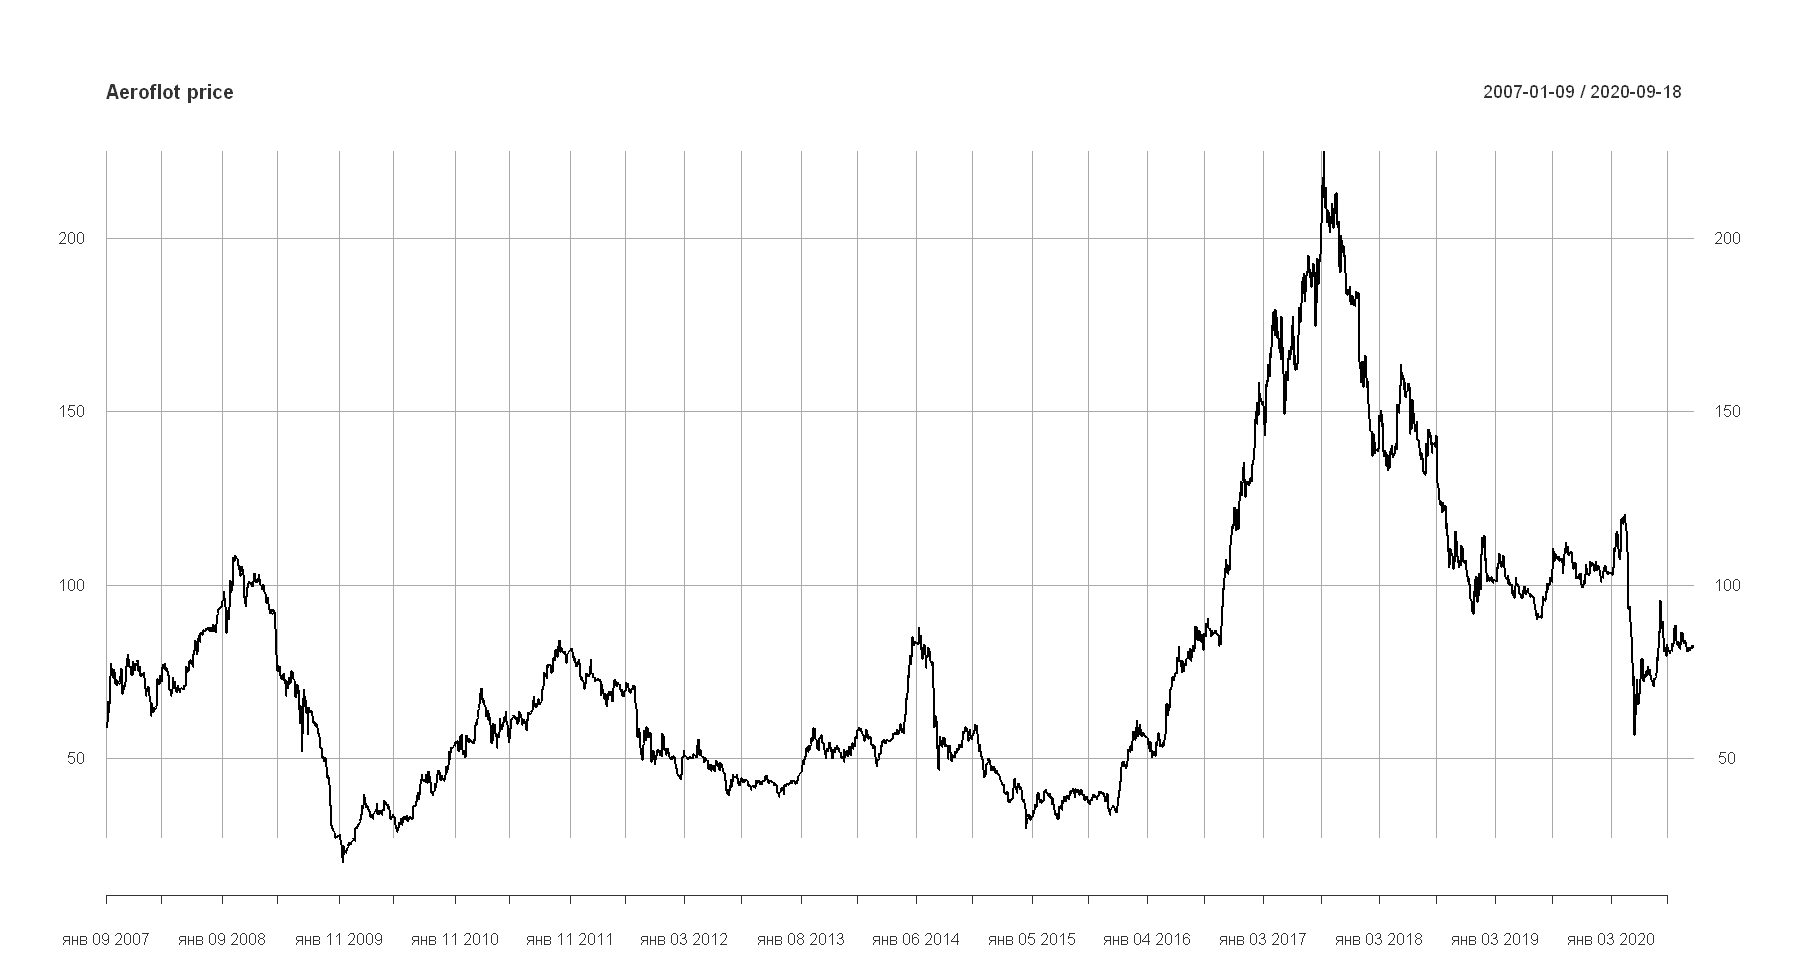

In [9]:
options(repr.plot.width=15, repr.plot.height=8) #In order to make the plots smaller
#par(mfrow = c(2, 1)) # Mostly for those who uses RStudio
plot(Apple_price, main = 'Apple price')
plot(Aeroflot_price, main = 'Aeroflot price')

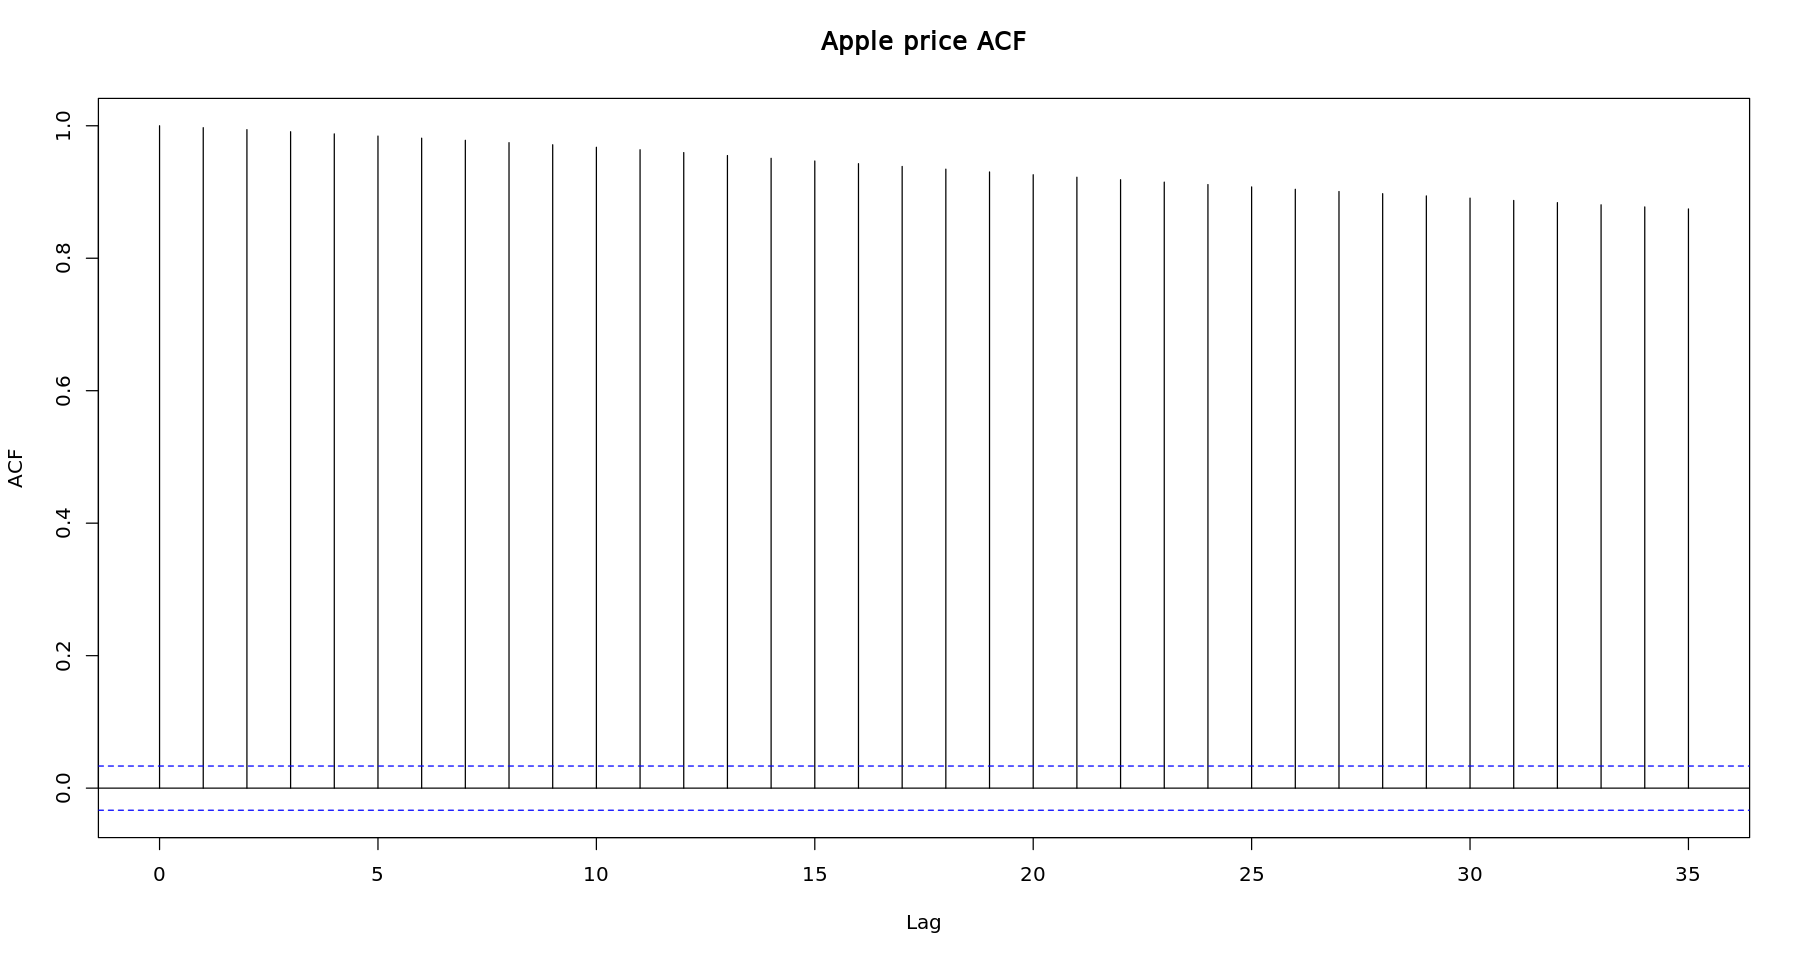

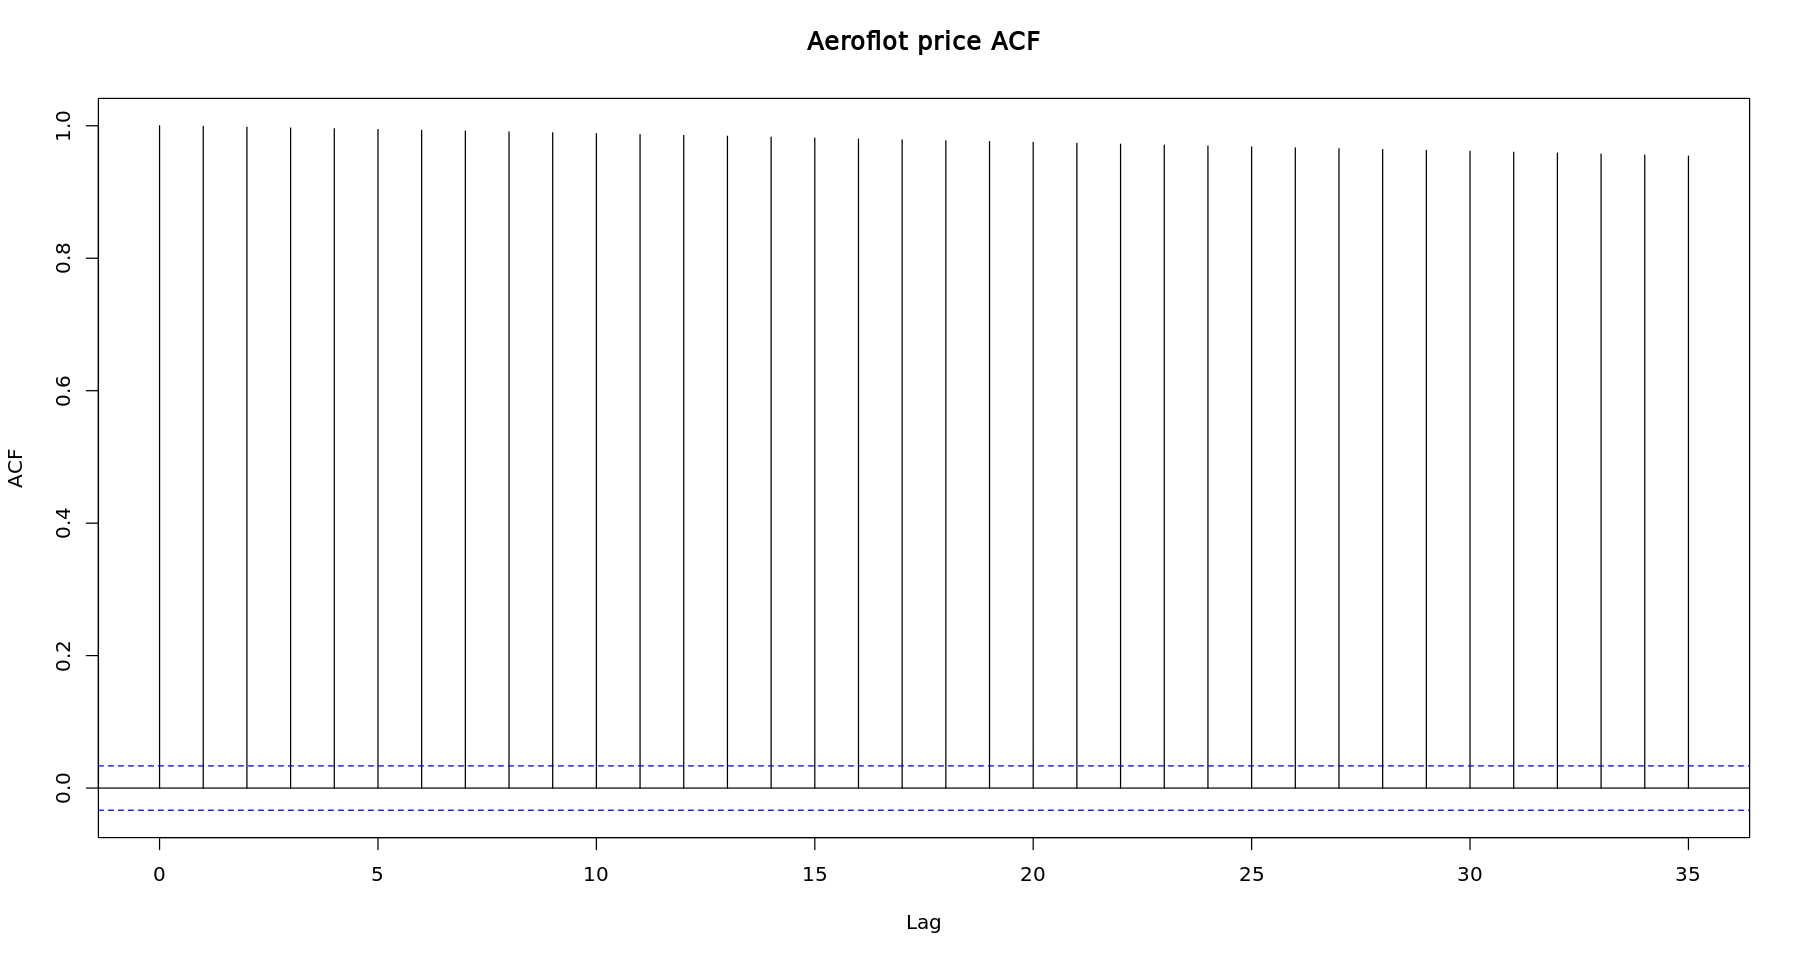

In [9]:
acf(Apple_price, main = 'Apple price ACF')
acf(Aeroflot_price, main = 'Aeroflot price ACF')

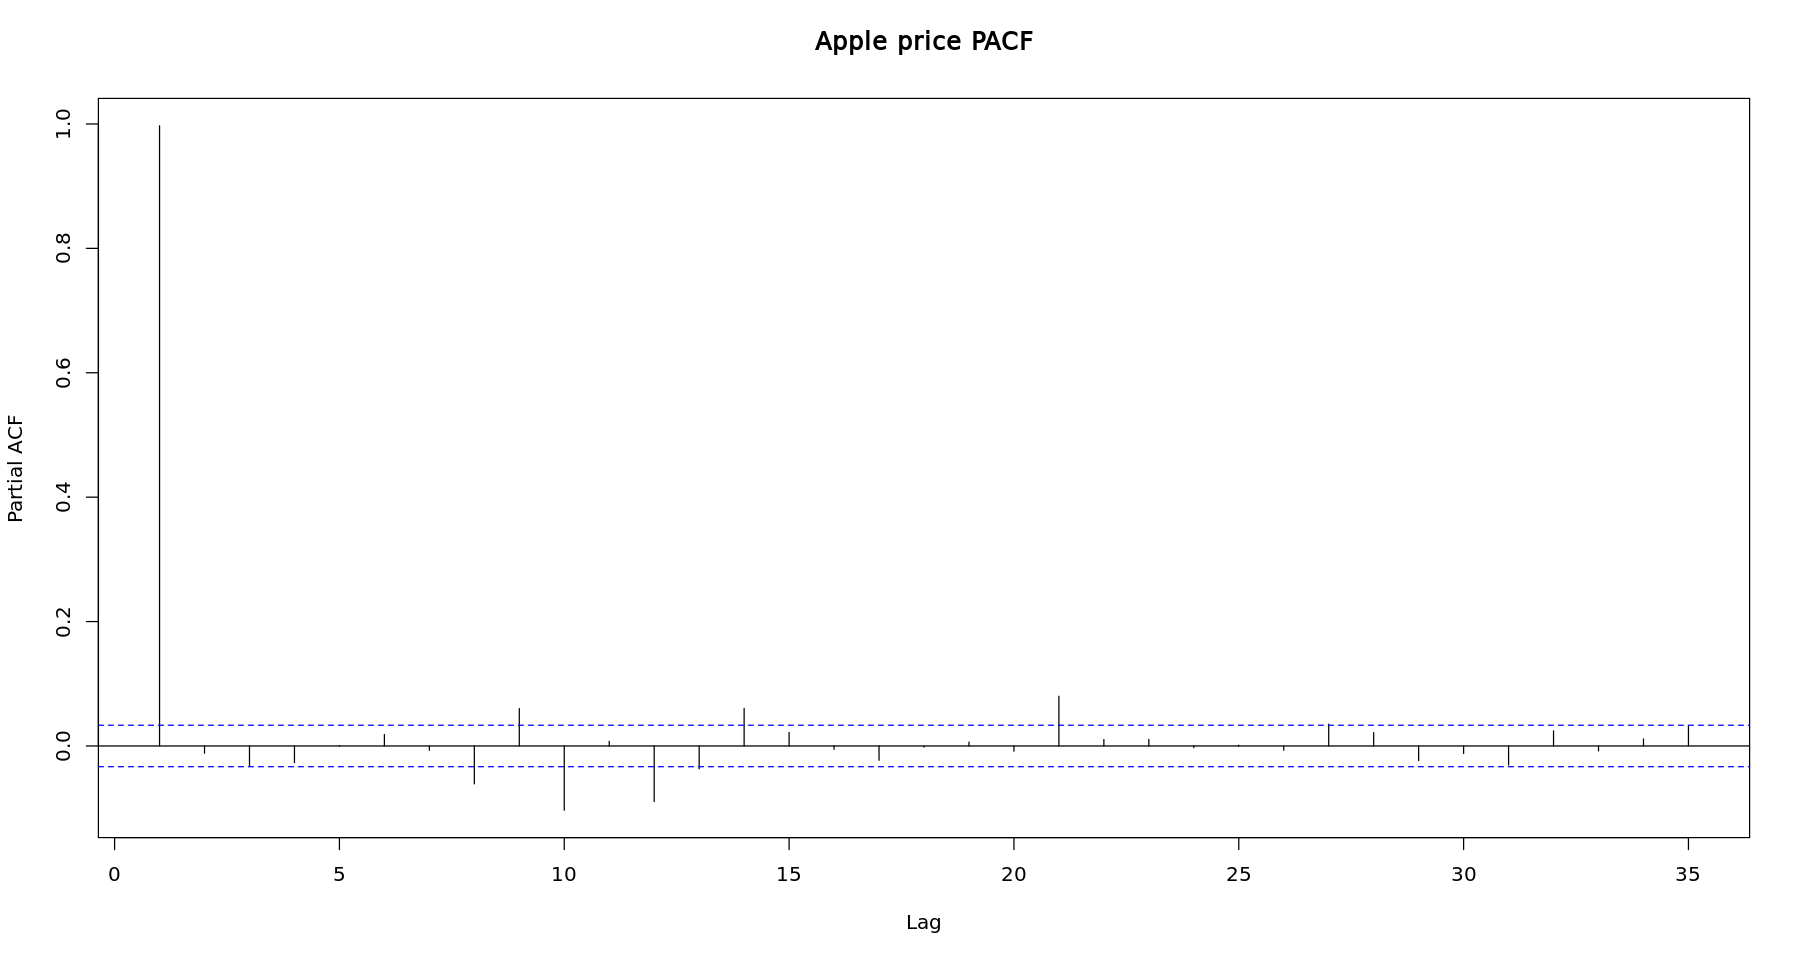

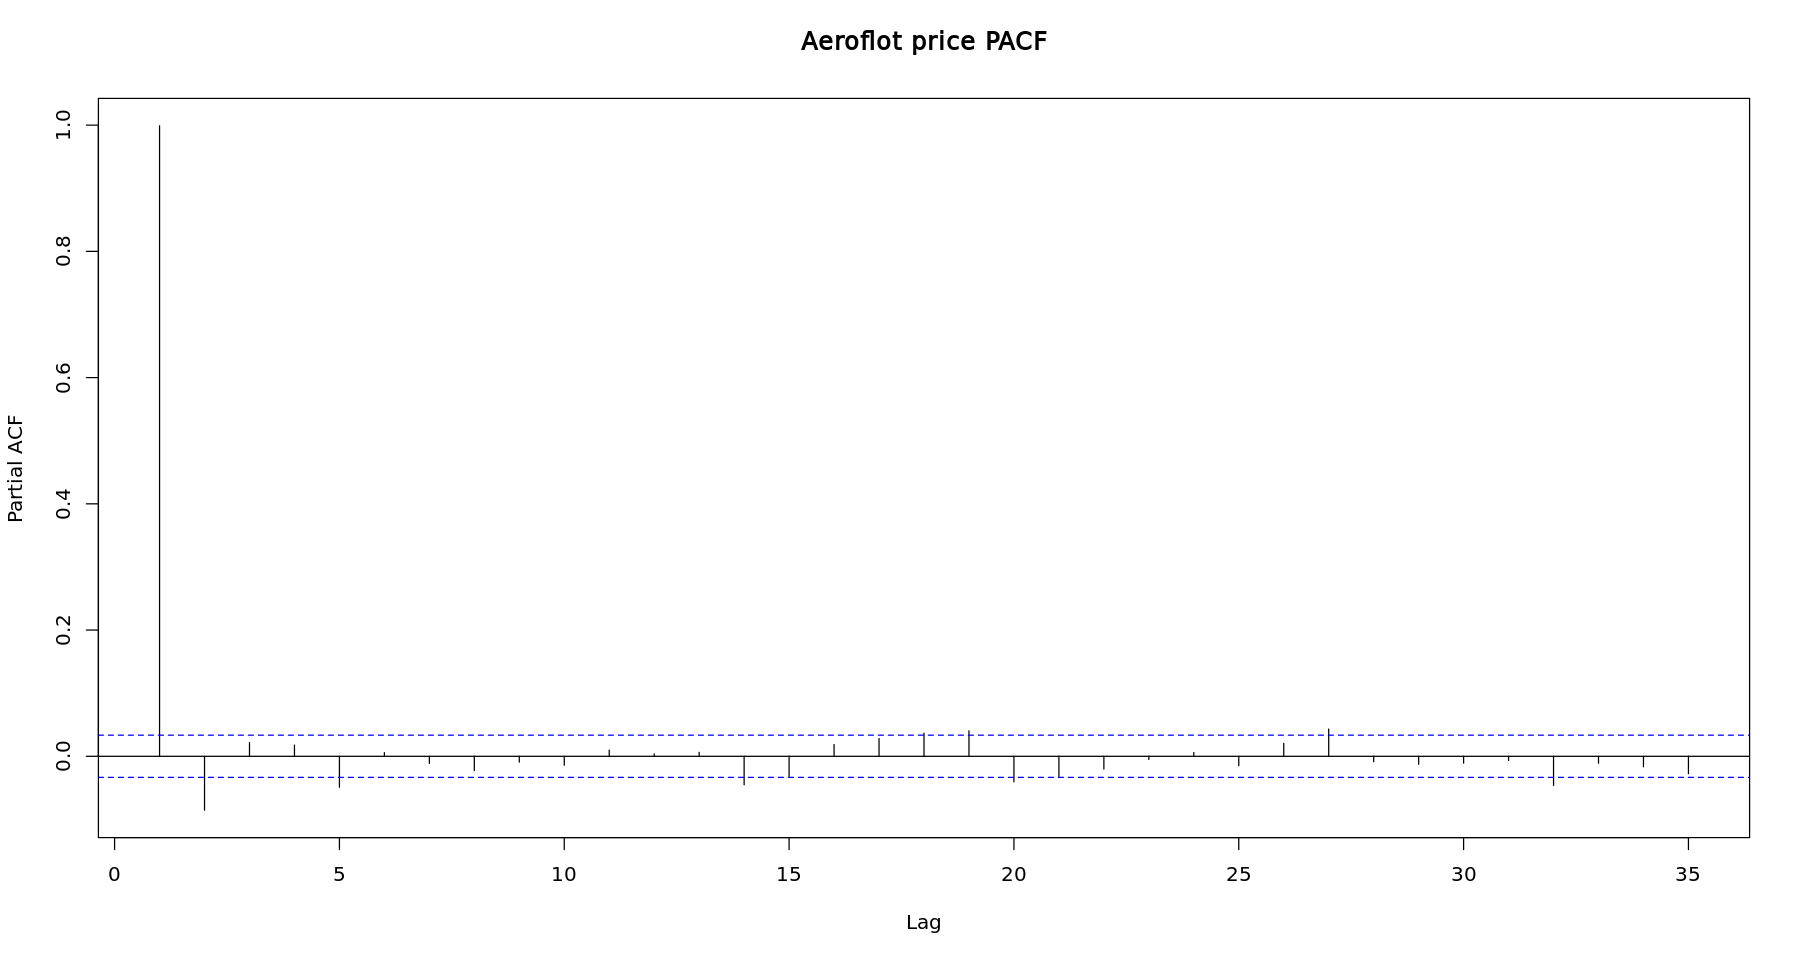

In [10]:
pacf(Apple_price, main = 'Apple price PACF')
pacf(Aeroflot_price, main = 'Aeroflot price PACF')

In [11]:
adf.test(Apple_price)
adf.test(Aeroflot_price)


	Augmented Dickey-Fuller Test

data:  Apple_price
Dickey-Fuller = -0.59011, Lag order = 15, p-value = 0.9777
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Aeroflot_price
Dickey-Fuller = -1.7969, Lag order = 15, p-value = 0.6643
alternative hypothesis: stationary


Well, we can definitely say that prices are not stationary and they have autocorrelation.  
**Is it bad?** (Please, answer this question in detail. If you have problems with it you better read literature suggested in the syllabus)

### Prices are bad, returns are good (in most cases)
Let's transform our prices into returns using one of the formulas

- One-period simple gross return:
$$1 + R_{t} = \frac{P_{t}}{P_{t-1}}$$ or $$P_{t} = P_{t-1} \cdot (1 + R_{t})$$
- One-period net return:
$$R_{t} = \frac{P_{t}}{P_{t-1}} - 1 = \frac{P_{t} - P_{t-1}}{P_{t-1}}$$
- K-period return:
$$1 + R_{t}^{k} = \frac{P_{t}}{P_{t-k}} = \frac{P_{t}}{P_{t-1}}\cdot\frac{P_{t-1}}{P_{t-2}}\cdot...\cdot\frac{P_{t-k+1}}{P_{t-k}} = (1+R_{t})\cdot(1+R_{t-1})\cdot...\cdot(1+R_{t-k+1}) = \prod_{j = 0}^{k-1}(1 + R_{t-j})$$
- Log returns:
$$r_{t} = ln(1+R_{t}) = ln(\frac{P_{t}}{P_{t-1}}) = p_{t} - p_{t-1}$$

In [12]:
# We will use log returns as they are... (please read lecture notes)
Apple_return <- diff(log(Apple_price))[-1] * 100
Aeroflot_return <- diff(log(Aeroflot_price))[-1] * 100

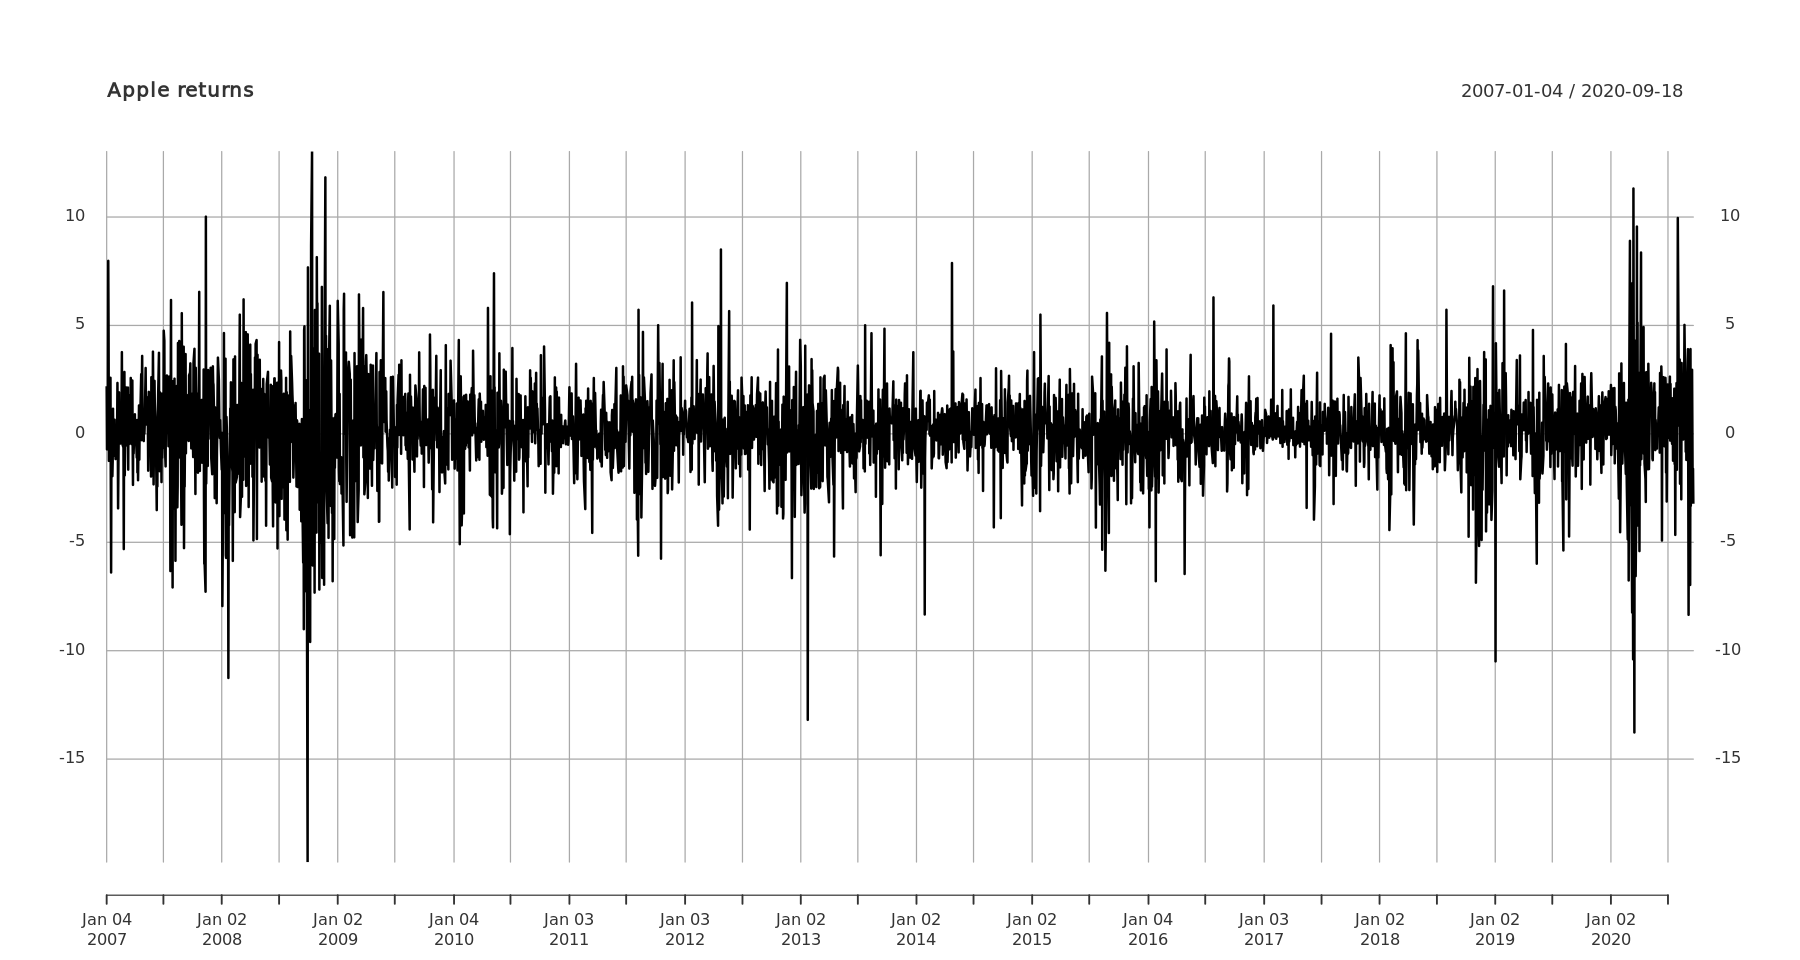

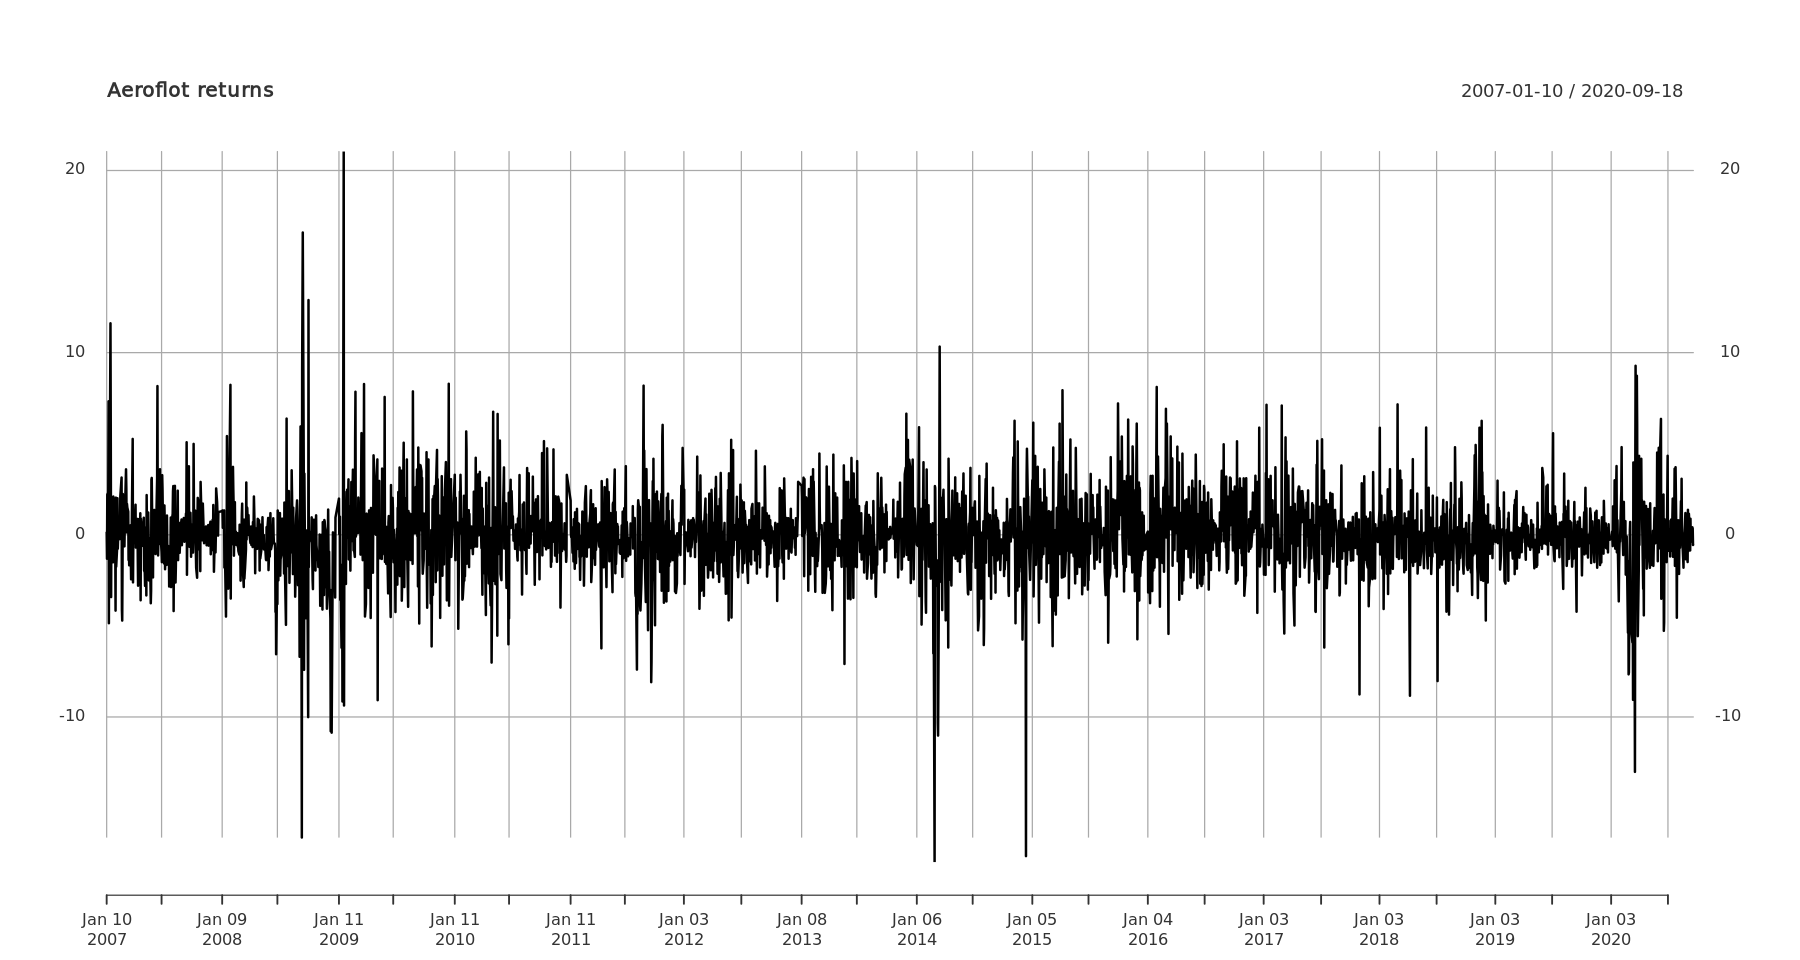

In [13]:
plot(Apple_return, main = 'Apple returns')
plot(Aeroflot_return, main = 'Aeroflot returns')

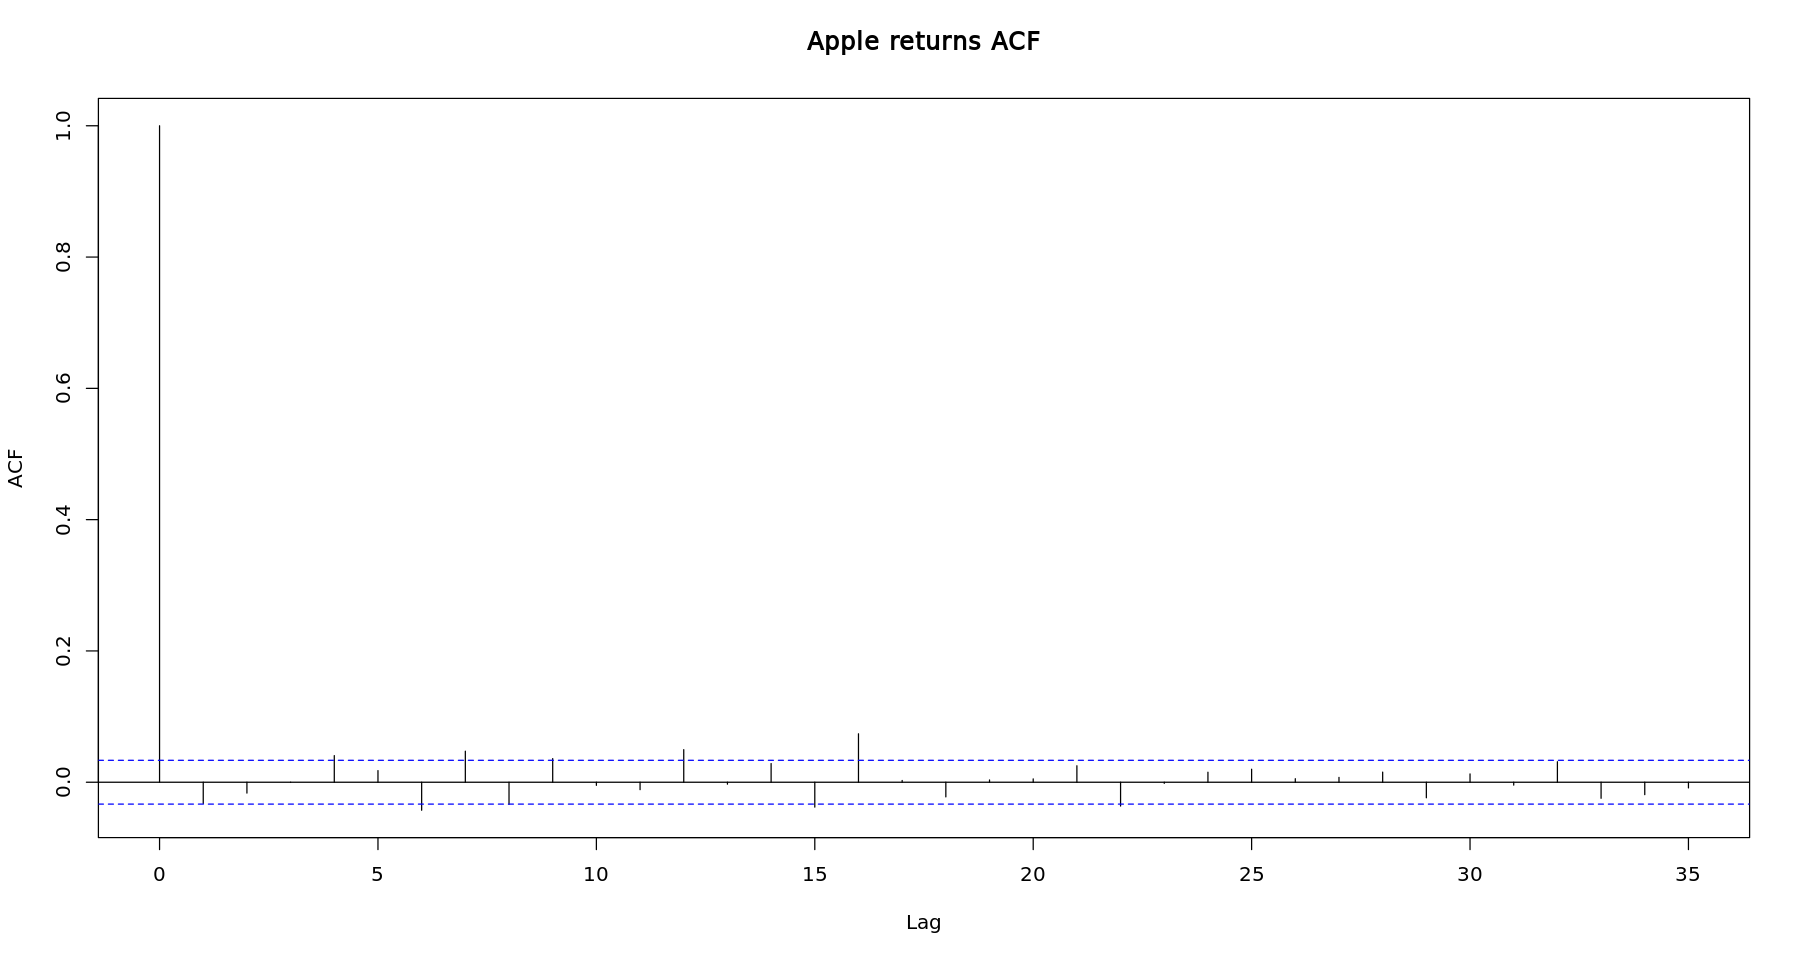

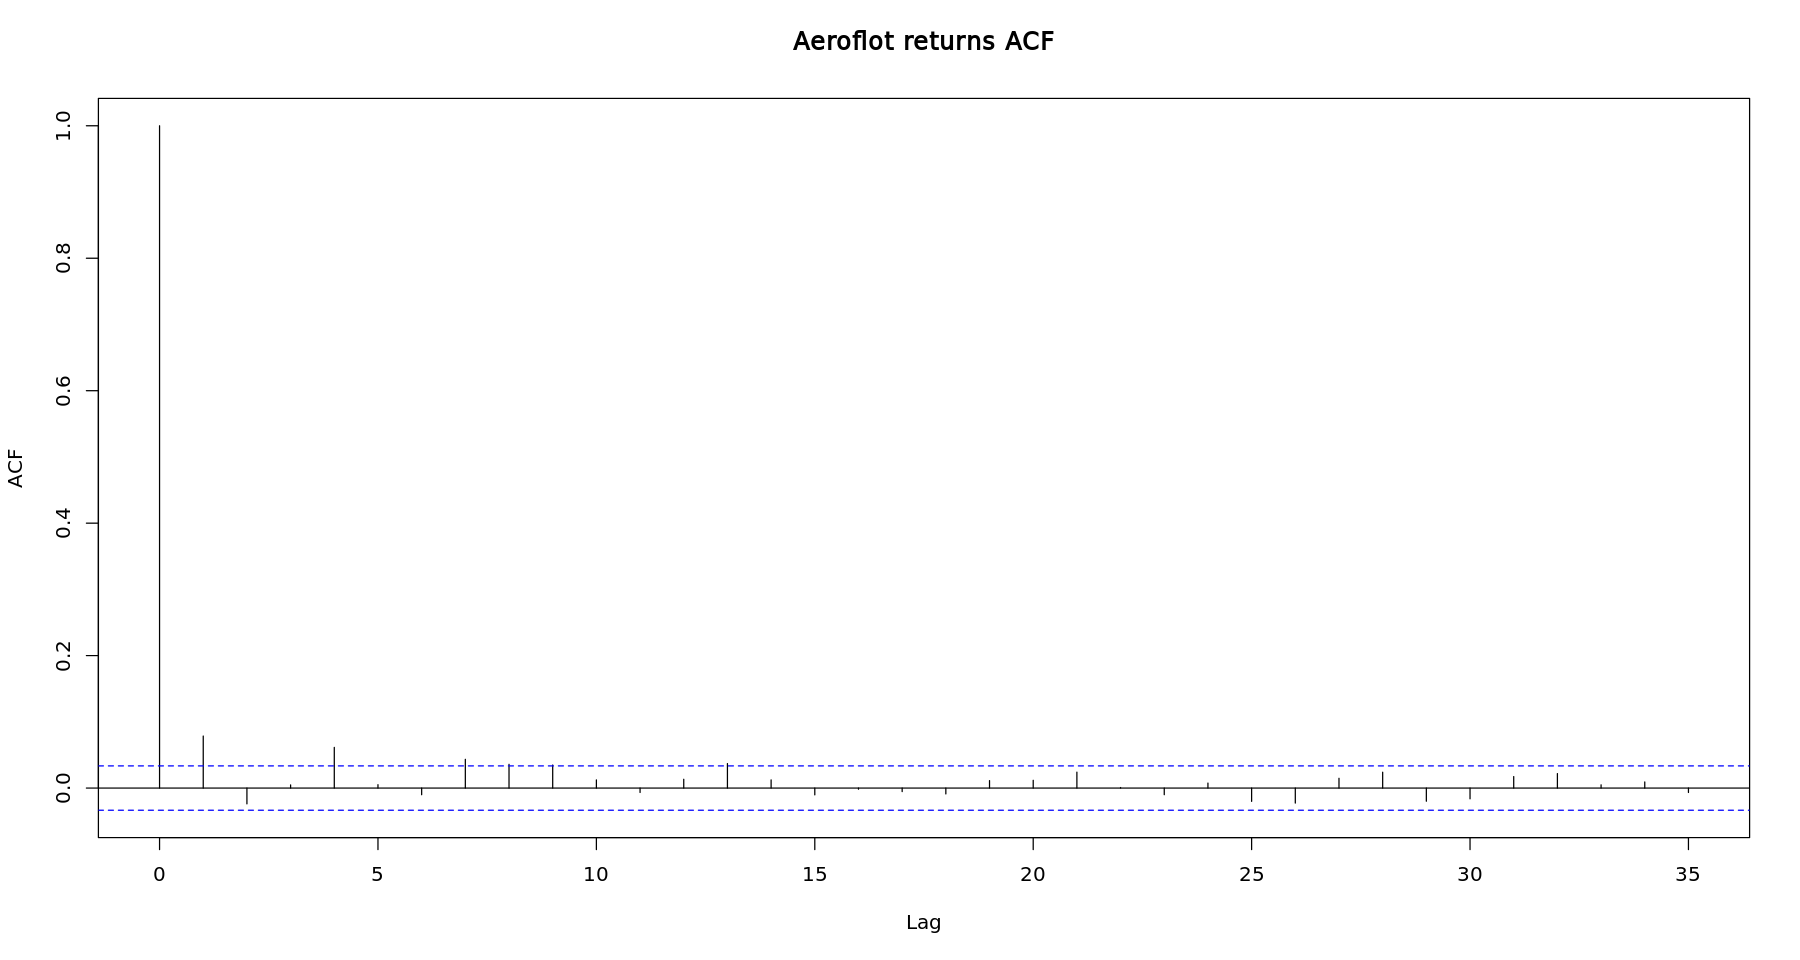

In [14]:
acf(Apple_return, main = 'Apple returns ACF')
acf(Aeroflot_return, main = 'Aeroflot returns ACF')

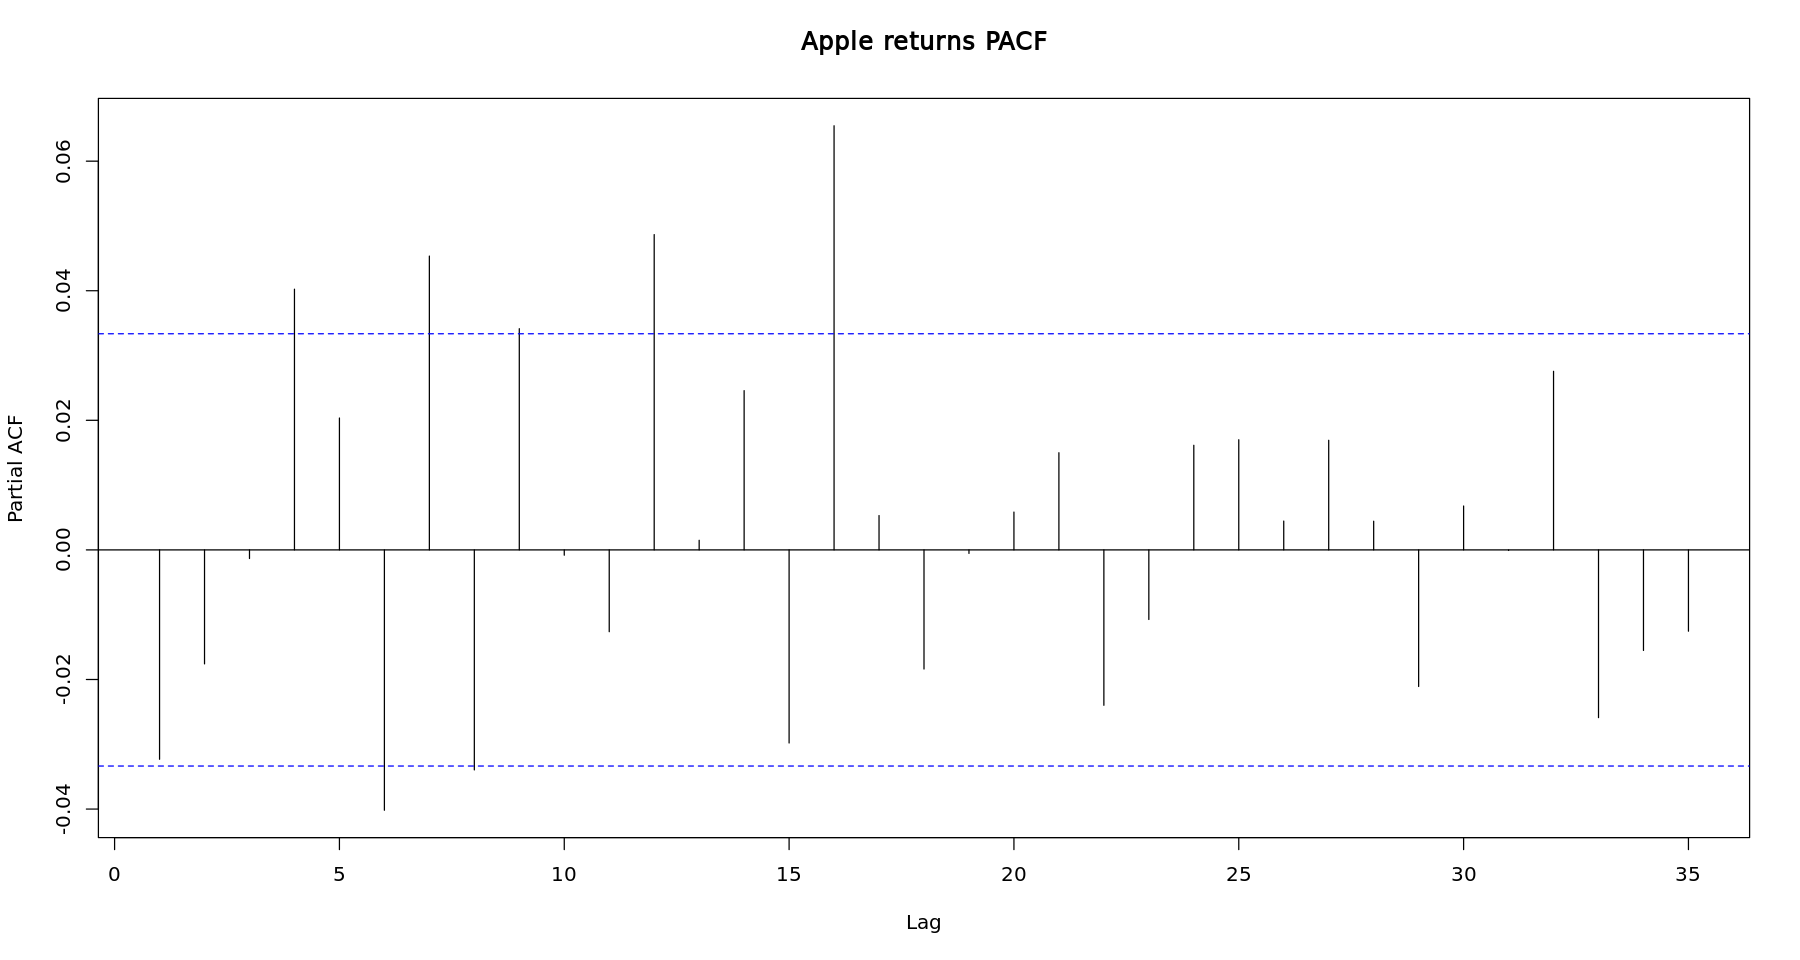

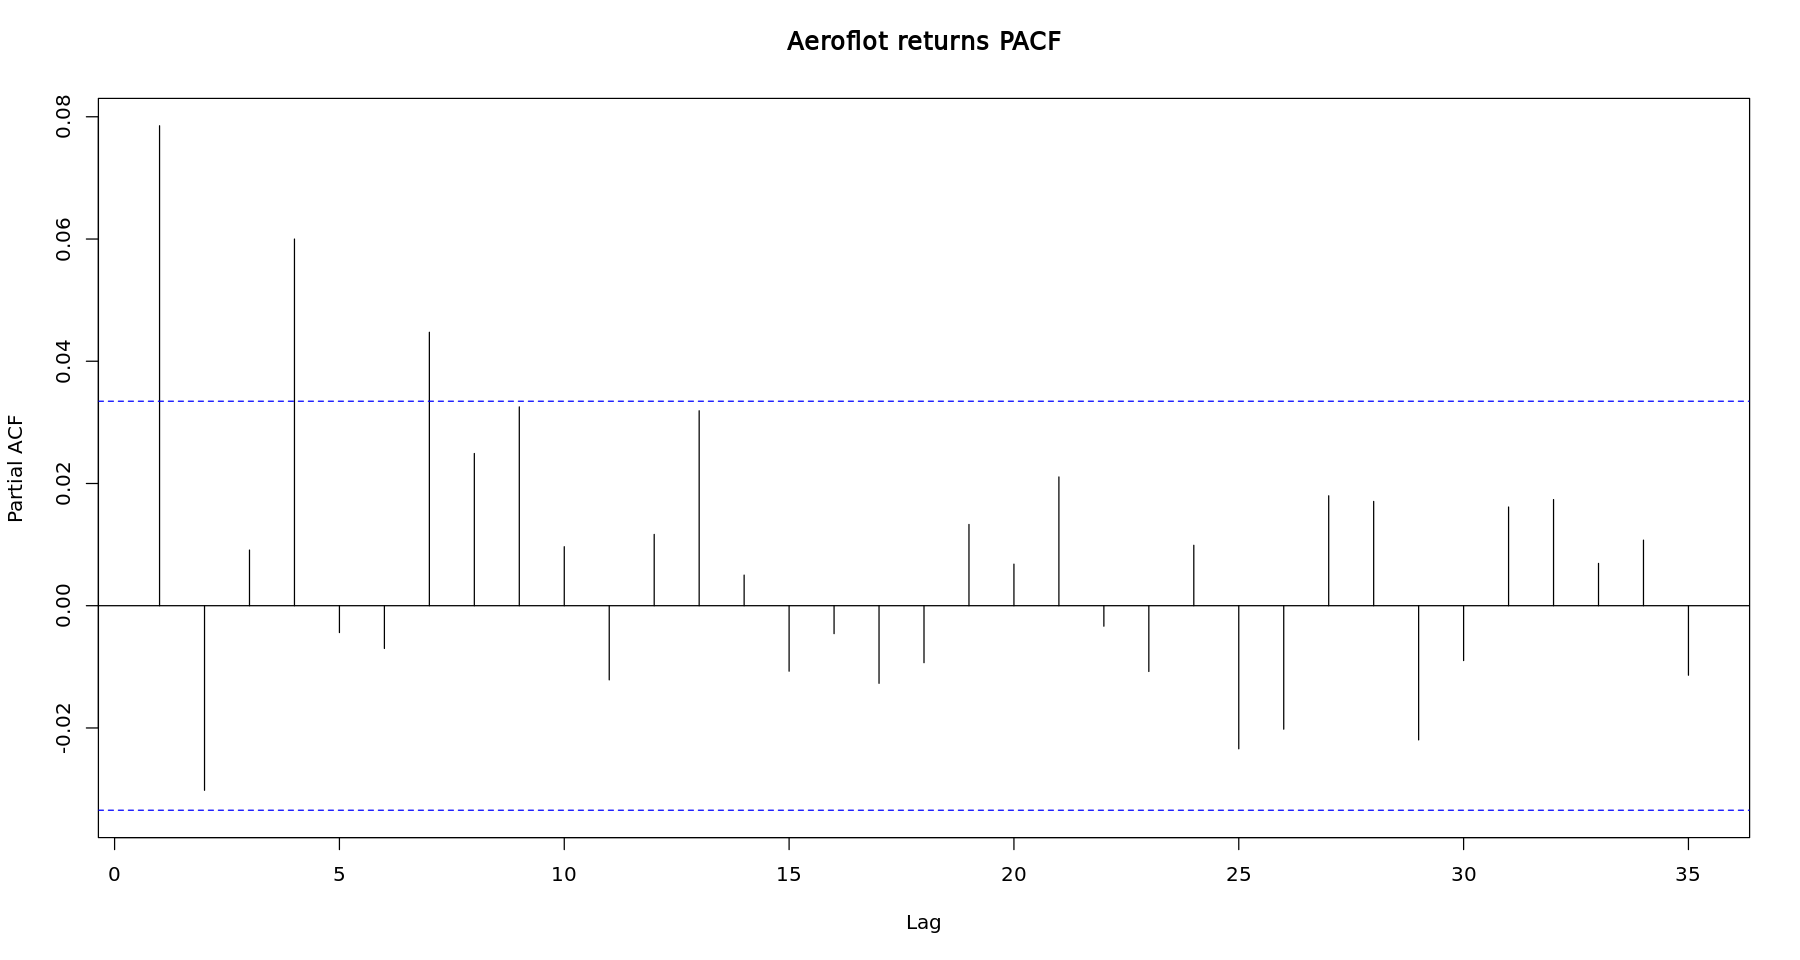

In [15]:
pacf(Apple_return, main = 'Apple returns PACF')
pacf(Aeroflot_return, main = 'Aeroflot returns PACF')

In [16]:
adf.test(Apple_return)
adf.test(Aeroflot_return)

Warning message in adf.test(Apple_return):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Apple_return
Dickey-Fuller = -12.948, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(Aeroflot_return):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Aeroflot_return
Dickey-Fuller = -13.355, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


Well, returns are definitely better. They do not have autocorrelation and they are stationary.  
What about other properties?

**Are returns normal?**

In [17]:
skewness(Apple_return) # should be equal to 0
skewness(Aeroflot_return) # should be equal to 0
kurtosis(Apple_return) # should be equal to 3
kurtosis(Aeroflot_return) # should be equal to 3

AAPL.Adjusted 
   -0.4417021

AFLT.Close 
-0.04834503

AAPL.Adjusted 
      10.2153

AFLT.Close 
   11.8901

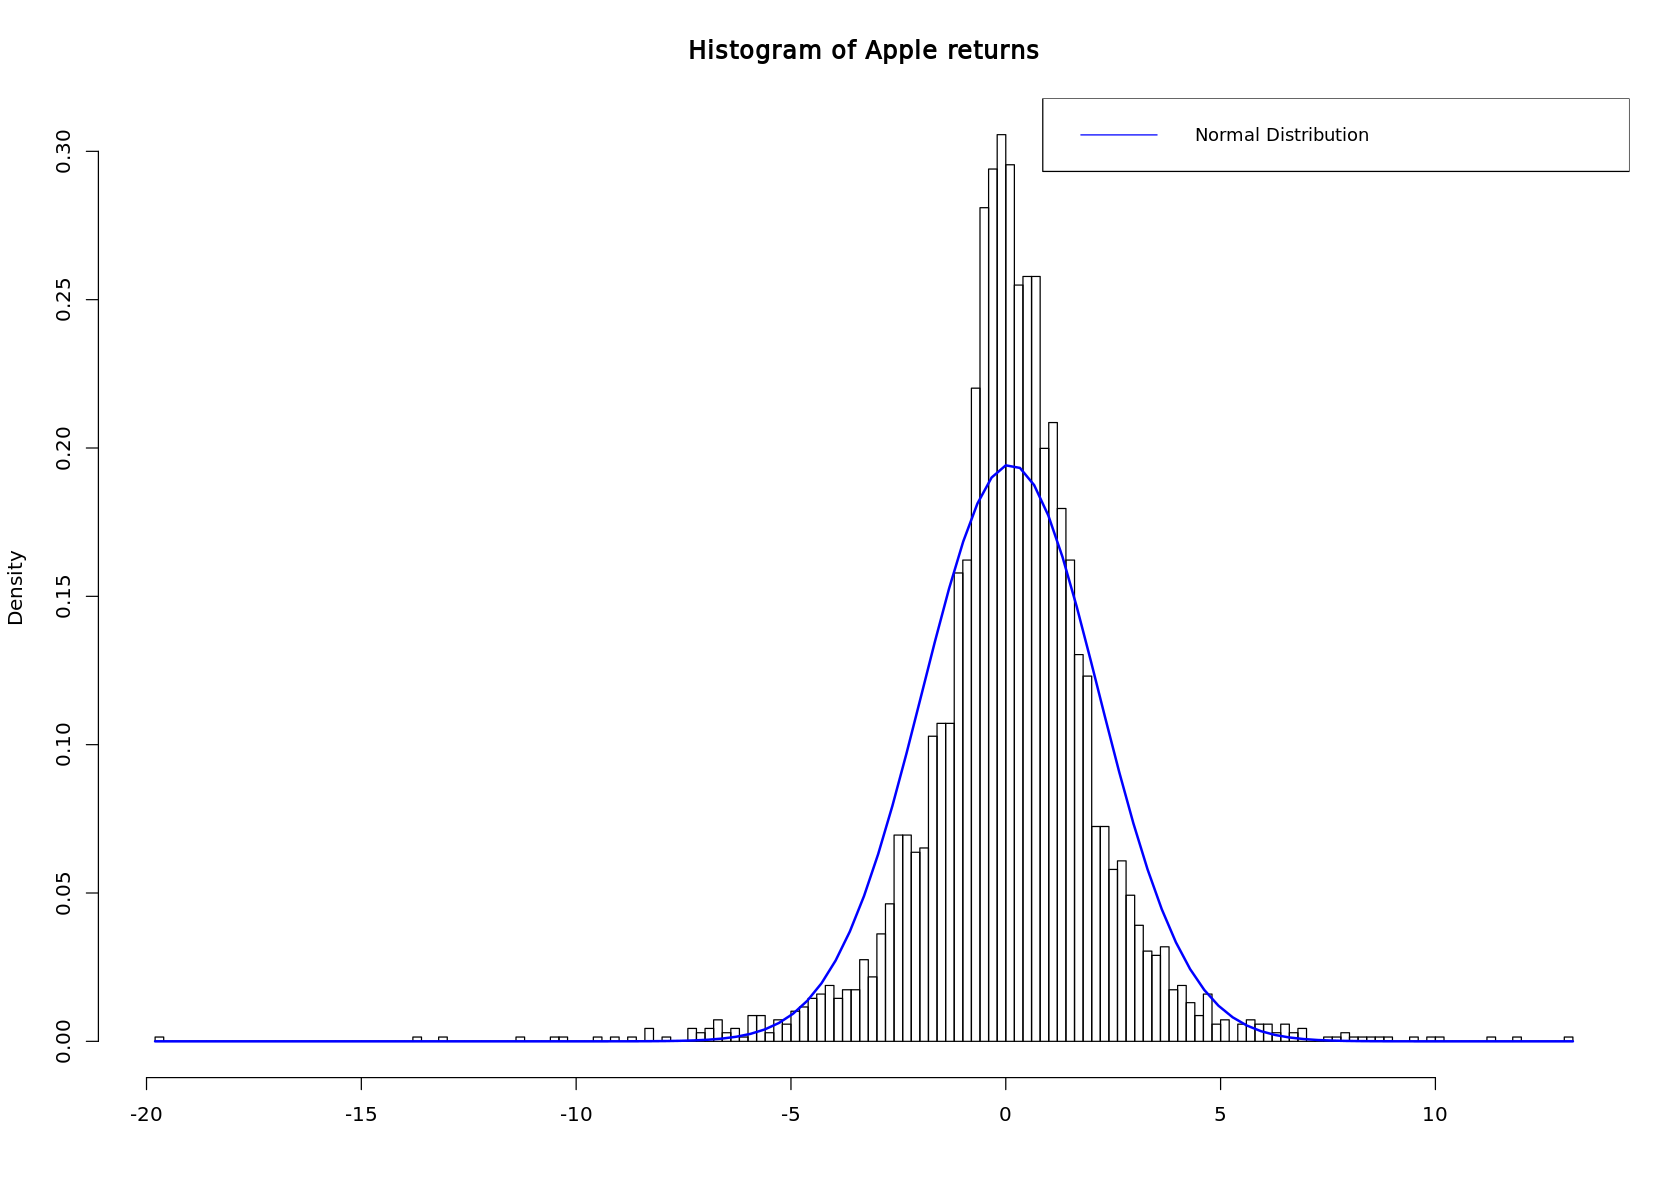

In [18]:
options(repr.plot.width=14, repr.plot.height=10)
hist(Apple_return, freq = FALSE, breaks = 'FD', main = 'Histogram of Apple returns', xlab = NULL)
curve(dnorm(x, mean = mean(Apple_return), sd = sd(Apple_return)), col="blue", lwd=2, add=TRUE)
legend("topright", legend = "Normal Distribution", col = "blue", lty=1:2, cex = 0.9)

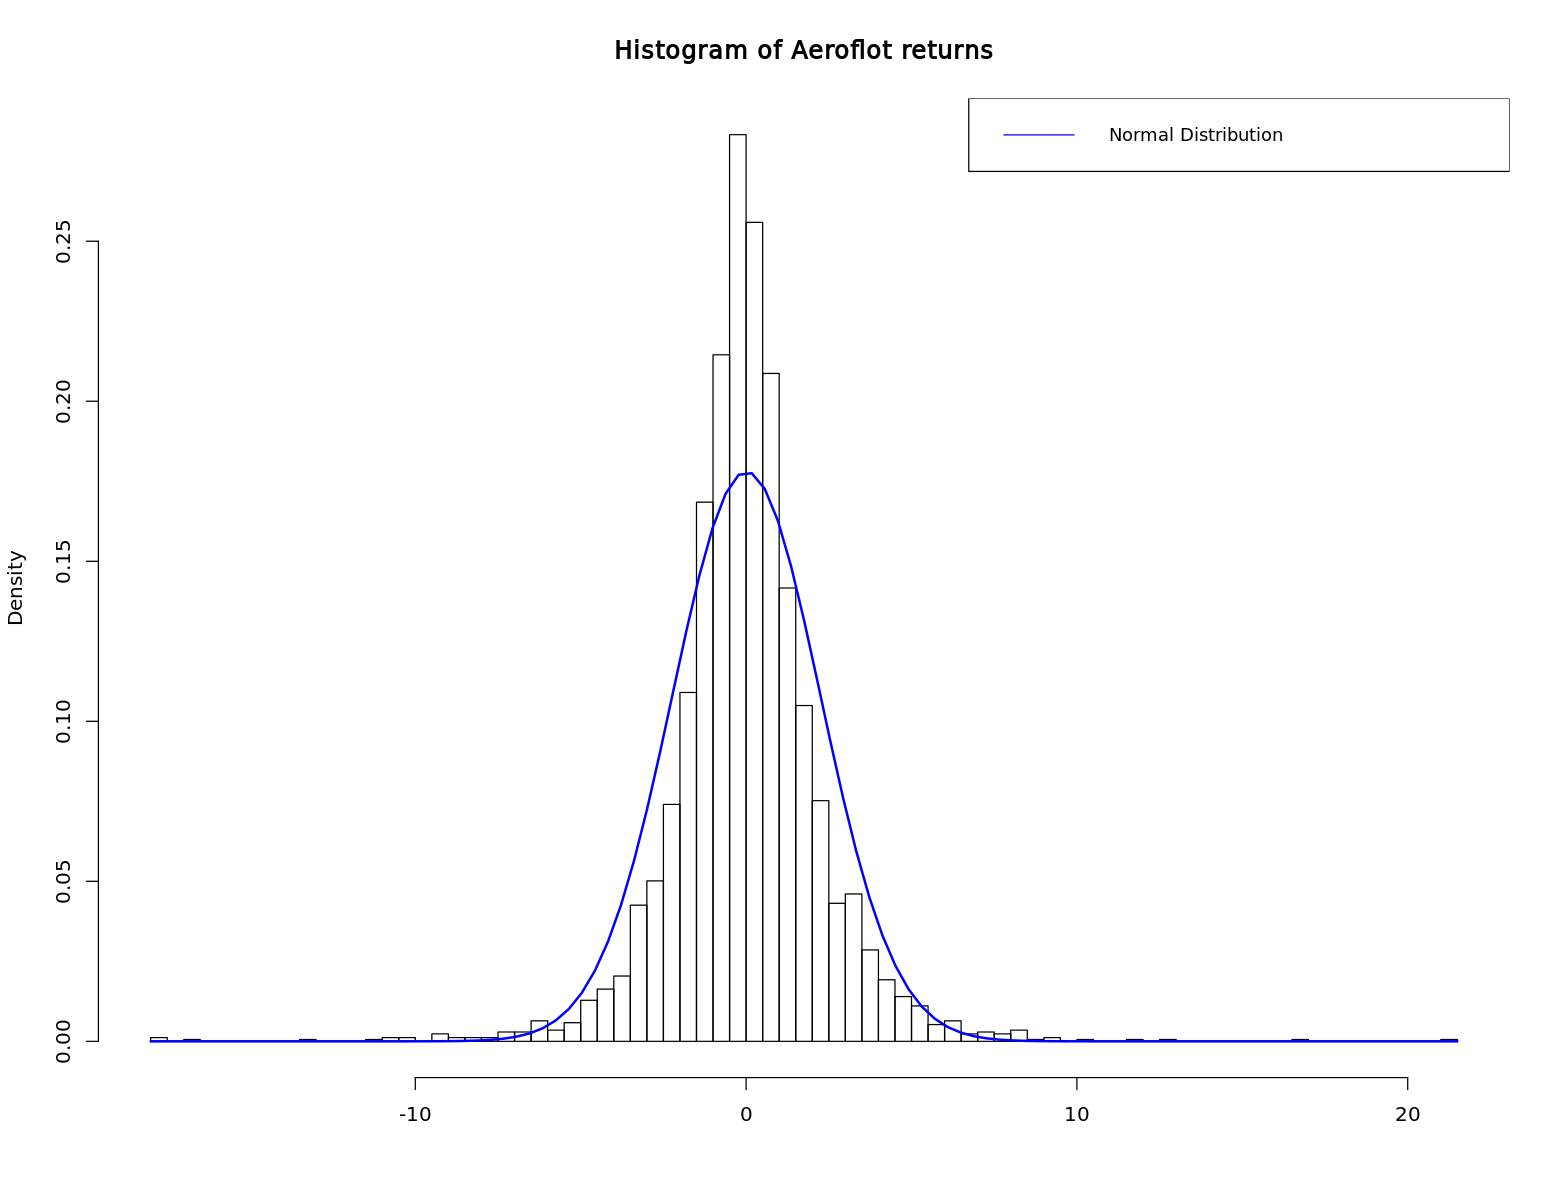

In [19]:
options(repr.plot.width=13, repr.plot.height=10)
hist(Aeroflot_return, freq = FALSE, breaks = 'FD', main = 'Histogram of Aeroflot returns', xlab = NULL)
curve(dnorm(x, mean = mean(Aeroflot_return), sd = sd(Aeroflot_return)), col="blue", lwd=2, add=TRUE)
legend("topright", legend = "Normal Distribution", col = "blue", lty=1:2, cex = 0.9)

In [20]:
jarque.bera.test(Apple_return)
jarque.bera.test(Aeroflot_return)


	Jarque Bera Test

data:  Apple_return
X-squared = 7600.3, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  Aeroflot_return
X-squared = 11300, df = 2, p-value < 2.2e-16


*I hope you remember what Jarque-Bera test is.* 
*For those of you who does not:*
$$JB = T\cdot(\frac{S^{2}}{6}+\frac{(K-3)^{2}}{24})\sim\chi^{2}_{2}$$
So, returns are definitely not normally distributed.  
**Do all returns have such properities? Is it all we should know about it?**

### Stylized facts of returns
[Cont, 2001](http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf)

**In short:**
- Absence of linear autocorrelation
- Heavy tails: the (unconditional) distribution of returns seems to display a power-law with coefficients between 2 and 5
- Gain/loss asymmetry: “going up with the stairs, down with the elevator”
- Time-varying correlations
- Volatility clustering:  high-volatility events tend to cluster in time
- Leverage effect: most measures of volatility of an asset are negatively correlated with the returns of that asset  
**Please read the paper for more stylized facts and their explanation in detail!**

###  Financial data types:
- Stocks: prices, dividends, returns, trade volumes
- Bonds: prices, returns, yield, trade volume, rating, spread over benchmark
- Commodities: prices, trade volume, settlement price and date, margin, derivatives
- Equity indices: price/performance index, dividend yield, total return
- Futures
- Options: strike, settlement date, call/put, American/European/Asian, price, underlying asset, volume traded, IV
- Reporting: revenue, profits, EBIT(DA), FCFF, FCFE, book value of equity, long-term debt etc.
- Deal data: M&A, IPO, SPO
- Economics data: Money supply, GDP, employment, inflation

### Sources of financial data
- Yahoo Finance, Google Finance, Finam
- Moscow Exchange
- Goskomstat, Eurostat, National Central Bank, National economic and financial ministries
- OECD, World Bank

### Sources of financial data (HSE)
- [ThomsonReuters Eikon](https://fmlab.hse.ru/treikon)
- [Bloomberg](https://finance.hse.ru/bloomberg_terminal)
- [Datastream](https://infobase.thomsonreuters.com/infobase/login/?next=/infobase/)
- [Compustat](https://finance.hse.ru/bloomberg_terminal)
- [Capital IQ](https://finance.hse.ru/bloomberg_terminal)
- [Zephyr](https://finance.hse.ru/bloomberg_terminal)
- [Ruslana, Amadeus](https://finance.hse.ru/bloomberg_terminal)
- Please, also visit [icef page](https://icef.hse.ru/databases/) about databases

### Finance and econometrics courses
- [Damodaran's course on valuation, corporate finance and investment](http://pages.stern.nyu.edu/~adamodar/)
- [Almgren and Reider's time series analysis and statistical arbitrage (NYU math finance)](http://cims.nyu.edu/~almgren/timeseries/)
- [Cochrane's empirical asset pricing course](http://faculty.chicagobooth.edu/john.cochrane/teaching/Empirical_Asset_Pricing/)  
And his [book](http://ecsocman.hse.ru/data/018/648/1219/finbook.pdf)
- [Harvey's global asset allocation and stock selection (Duke MBA finance course)](http://www.duke.edu/~charvey/Classes/ba453/syl453.htm)
- [Lesniewski and Andersen's interest rate and credit models (math NYU course)](http://www.math.nyu.edu/~alberts/spring07/index.html)
- [Hansen's book on econometrics](http://www.ssc.wisc.edu/~bhansen/econometrics/)
- [Linton's empirical finance course](http://www.oliverlinton.me.uk/teaching/empirical-finance)
- [Hastie, Tibshirani, Friedman's elements of statistical learning course](https://web.stanford.edu/~hastie/ElemStatLearn/)
- [John Cochrane (asset pricing, macro finance)](http://faculty.chicagobooth.edu/john.cochrane/)
- [William Schwert (financial econometrics and M&A)](http://schwert.simon.rochester.edu/)
- [Lasse H. Pedersen (liquidity risk and financial crisis)](http://people.stern.nyu.edu/lpederse/index.htm)
- [Cochrane's Grumpy Economist](http://johnhcochrane.blogspot.com/)
- [Diebold's No hesitations](https://fxdiebold.blogspot.com/)
- [Dave Giles' Econometrics beat](http://davegiles.blogspot.com/)
- [HSE Econometrics](https://www.coursera.org/learn/ekonometrika)
- [Practical Time Series Analysis](https://www.coursera.org/learn/practical-time-series-analysis)
- Financial Engineering and Risk Management [part 1](https://www.coursera.org/learn/financial-engineering-1) and [part 2](https://www.coursera.org/learn/financial-engineering-2)